#### Jérémy TREMBLAY

# TP5 : QLearning

In [87]:
# Import the libraries that will be used in this notebook.
import gym
import time
import numpy as np

# Import the pyplot module from matplotlib with the plt alias.
import matplotlib.pyplot as plt

## Task 1: Display the initial state

**Consigne :** Pour cette première partie de TP, nous allons utiliser l’environnement de jeu « FrozenLake-v1 » où un agent doit se déplacer vers un objectif sur une carte simplifiée mais piégée. Voici quelques informations sur l’environnement :
* Les variables `action_space` et `observation_space` donnent des informations globales sur l’environnement.
* L’agent peut se déplacer en haut, en bas, à gauche et à droite (quand cela est possible).
* L’agent connaîtra à chaque étape de jeu, après réalisation d’une action, l’endroit où il se situe sur la carte.
* Le jeu se termine lorsque l’agent atteint l’objectif ou qu’il tombe une cellule de glace.
* La méthode `reset` permet de réinitialiser l’environnement.
* La méthode `render` permet l’affichage du jeu soit en mode ansi, soit en mode rgb_array.
* La méthode `step` qui prend en entrée une action à réaliser et fournie des informations : notamment sur l’état suivant et la récompense obtenue. 

Note : vous pouvez vous référer à la documentation spécifique à l’environnement *FrozenLake-1*. En important le package Python gym, il est possible d’initialiser l’environnement de jeu.  
Créez votre environnement et proposez un affichage de l’état initial.

Let's initialize the environment first.

In [88]:
# Let's initialize the environment.
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")

Let's render the game.

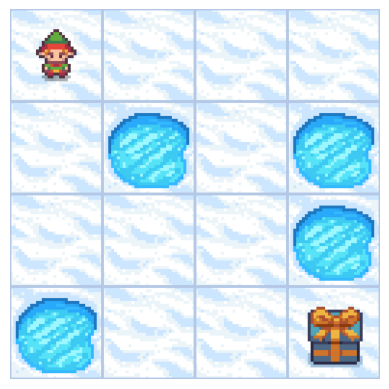

In [89]:
# Render the game and save it into a variable.
env.reset()
initial_state_image = env.render()

# Display it with matplotlib.
plt.imshow(initial_state_image)
plt.axis('off')  # Désactiver les axes
plt.show()

## Task 2: Make the agent move around

**Consigne :** Faire avancer manuellement votre agent dans l’environnement nouvellement créé de tel sorte à ce qu’il atteigne son objectif. Indications :
* Vous pouvez pour cela utiliser la méthode `step` de votre environnement qui retourne des informations importantes sur votre nouvel état.
* Utilisez l’`action_space` (voir documentation *Gym*).

First, let's define a function to display the current state; this function will be used multiple times in this notebook.

In [90]:
def display_state():
    """
    Displays the current state of the environment.

    This function renders the current state of the environment using the `env.render()` method,
    and displays the renderde image using Matplotlib. The axis is turned off for a cleaner display.

    Parameters:
        None

    Returns:
        None
    """
    state_image = env.render()
    plt.imshow(state_image)
    plt.axis('off')
    plt.show()

Now let's make our character go down one time. We need to understand how to move downside:

In [91]:
possible_actions = env.action_space
print(possible_actions)

Discrete(4)


Here we can see that we need to provide a discrete value to make our character move. From the Gym documentation, we can see:

```diff

The agent takes a 1-element vector for actions. The action space is (dir), where dir decides direction to move in which can be:
+ 0: LEFT
+ 1: DOWN
+ 2: RIGHT
+ 3: UP

```

Let's test it.

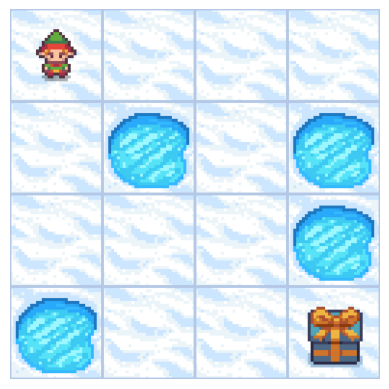

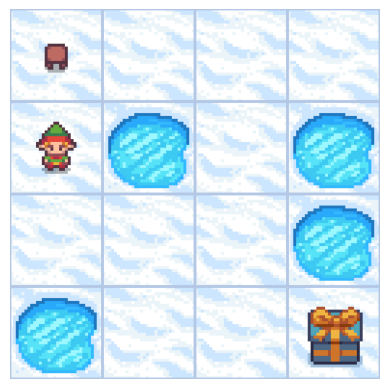

In [92]:
# Reset the environment.
current_state = env.reset()
display_state()

# 1 = Go down from the gym documentation.
action = 1

# Move the agent using the choosen action.
_ = env.step(action)

# Display the state after the action.
display_state()

Let's continue until we reach the end:

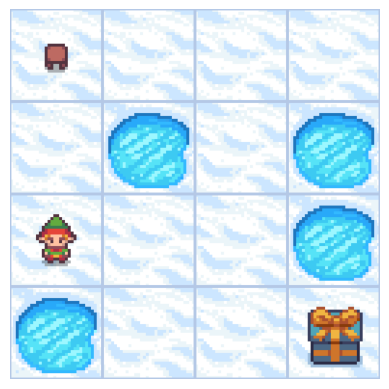

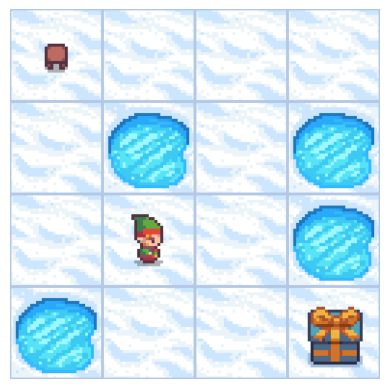

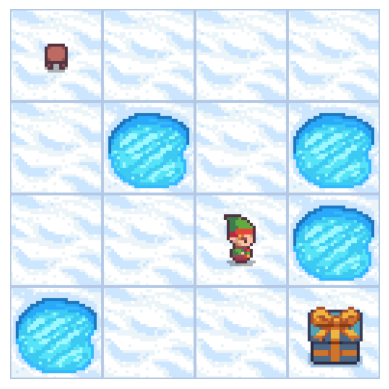

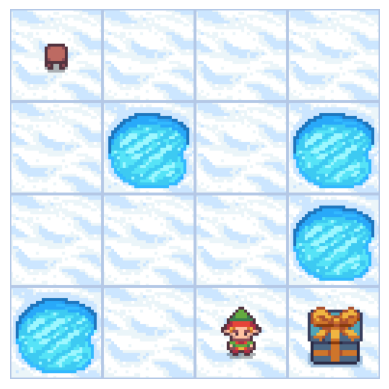

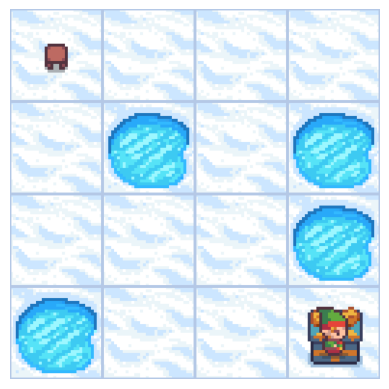

In [93]:
_ = env.step(1)
display_state()
_ = env.step(2)
display_state()
_ = env.step(2)
display_state()
_ = env.step(1)
display_state()
_ = env.step(2)
display_state()

Yeah !

## Task 3: Q-learning for the "Cliff walking" game

**Consigne :** Nous allons maintenant développer l’algorithme du Q-learning sur le jeu « Cliff walking ». Voici quelques particularités de l’environnement :
* L’objectif de l’agent est d’aller chercher le cookie à l’opposé de la carte sans aucune information au préalable.
* L’état de l’agent est désigné par la cellule sur laquelle il se trouve.
* Pour chaque pas effectué, l’agent reçoit une récompense négative de `-1`.
* Si l’agent tombe dans le ravin, alors il recommence au point de départ et récupère une récompense négative de `-100`.
* La partie se termine lorsque l’agent trouve le cookie.

Simuler une partie complète (épisode) en proposant des mouvements aléatoires jusqu’à ce que le personnage atteigne son objectif (fin de partie).

Let's initialize the environment:

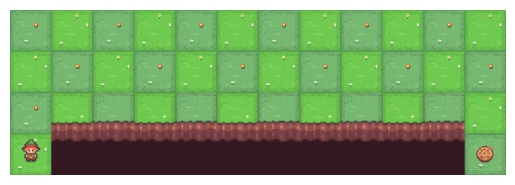

In [94]:
env = gym.make('CliffWalking-v0', render_mode="rgb_array")
env.reset()
display_state()

Let's use it:

In [95]:
# Reset the environment to the initial state.
state = env.reset()
total_reward = 0
done = False

# Simulate the episode with random movement until the end of the game.
while not done:
    # Select a random action.
    action = env.action_space.sample()

    # Apply the aciton to the environment and get the information.
    next_state, reward, done, _, _ = env.step(action)

    # Increase rewards.
    total_reward += reward

    # Render the current state (comment out this line if you don't want to display at each step).
    # display_state()

# Print the total reward of the episode
print(f"Total reward for the episode: {total_reward}")

Total reward for the episode: -57438


It is a little bit bad.

## Task 4: Initialize a Q-table matrix

**Consigne :** Initialiser une matrice Q-table de la taille de l’environnement (observation) et du nombre d’actions possibles. Toutes les valeurs doivent être initialisées à 0. Indications :
* Vous pouvez utiliser la librairie `numpy` et notamment `numpy.zeros`.
* La Q-table va permettre de stocker l’ensemble des récompenses obtenues pour chaque tuple (état, action).

In [96]:
# Define the size of the Q-table basde on the environment's observation space and action space.
observation_space_size = env.observation_space.n
action_space_size = env.action_space.n

# Initialize the Q-table with zeros.
Q_table = np.zeros((observation_space_size, action_space_size))

# Display the initialized Q-table.
print("Initialized Q-table:")
print(Q_table)

Initialized Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Task 5: Define a `epsilon_greedy` function

**Consigne :** Définir une fonction `epsilon_greedy` qui prend en paramètres la *Q-table*, un état *s* et une valeur d’epsilon fixée à 0.1 par défaut. Cette fonction retourne l’indice d’une action. Pour un nombre *r* aléatoire (*r* € *[0, 1]*), la fonction doit :
* Si toutes les Q(*s*, *ai*) sont de la même valeur, on retourne une action aléatoire.
* Si *r* < ϵ, alors on retourne une action aléatoire pour l’état.
* Sinon, on retourne l’action ayant le plus de récompenses.

In [97]:
def epsilon_greedy(Q_table, state, epsilon=0.1):
    """
    Epsilon-greedy action selection.

    Parameters:
        Q_table: np.ndarray
            The Q-table storing rewards for ech state-action pair.
        state: int
            The current state.
        epsilon: float, optional
            The exploration-exploitation trade-off parameter (default is 0.1).

    Returns:
        int
            The index of the selected action.
    """
    # Check if all Q values for the current state are equal or not.
    if np.all(Q_table[state] == Q_table[state][0]):
        # Choose a random action.
        return np.random.randint(len(Q_table[state]))

    # Generate a random number.
    r = np.random.rand()

    if r < epsilon:
        # Explore: Choose a random action.
        return np.random.randint(len(Q_table[state]))
    else:
        # Exploit: Choose the action with the maximum Q-value.
        return np.argmax(Q_table[state])

## Task 6: Create a greedy Q-learning algorithm

**Consigne :** Développer l’algorithme du Q-learning avec comme politique de choix *ϵ-greedy* :
* Le taux d’apprentissage α sera fixé par défaut à `0.5`.
* Le facteur d’actualisation γ sera fixé à `0.9`.
* À chaque fin de partie, il faudra fixer une récompense positive de réussite pour l’agent.
* Proposez de simuler `200` épisodes et visualiser votre *Q-table*.

To determine the reward for the agent when it wins, the best is to fix a score. Since it "wins" 100 of score when it loses, we will gim to him 100 when it arrives at the end. But this mecanism does not encourage short paths, so we will count the number of steps and retracts them from the score by 1 point.

In [98]:
# Define the parameters.
alpha = 0.5 
gamma = 0.9
num_episodes = 200
success_reward = 100
supplementary_step = 1

# The Q-table is already initialized but we reinit it (just in case).
observation_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q_table = np.zeros((observation_space_size, action_space_size))

# Initialize the environment.
env = gym.make('CliffWalking-v0', render_mode="rgb_array")

# Simulate Q-learning fr 200 episodes.
for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0
    number_of_steps = 0

    done = False
    while not done:
        # Choose action using epsilon-greedy policy.
        action = epsilon_greedy(Q_table, state)

        # Take the chosen action.
        next_state, reward, done, _, _ = env.step(action)
        number_of_steps += 1

        # Update Q-table using the Q-learning update rule.
        Q_table[state, action] += alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

        # Update total reward.
        total_reward += reward

        # Move to the next state.
        state = next_state

    # After each episode, fix a positive reward for success. here we substract the number of steps from the rewards to promote short paths.
    Q_table[state, action] += alpha * ((success_reward - supplementary_step * number_of_steps) - Q_table[state, action])

# Visualize the  Q-table.
print("Q-table after training:")
print(Q_table)

Q-table after training:
[[ -6.10045605  -5.98337227  -5.96368764  -6.10346029]
 [ -5.87259383  -5.79961754  -5.85755039  -5.90109137]
 [ -5.4456315   -5.48656201  -5.46850603  -5.7124136 ]
 [ -5.4935847   -5.1903808   10.89822974  -5.32658586]
 [ -5.17053764   9.81735301  -4.90139715  -5.24791828]
 [ -3.21616857  -4.40638305  25.57099655  -4.68986069]
 [ -4.31199908  27.09312111  -4.24173153  -4.33946329]
 [ -4.01263061  34.44398352  -3.91197991  -3.96572506]
 [ -3.36579569   9.02412698  39.06973973  13.00465647]
 [ 12.06401787  -3.01148632  21.14999911  32.82864828]
 [ -2.84252633  -2.55763379   0.97326911   5.66061855]
 [ -2.26219063  -2.26219063  -1.2223125   -2.48998906]
 [ -6.16011053   7.65542593  -6.32094594  -6.19650052]
 [ -5.82307245  15.41903504  -5.96234205  -5.88997161]
 [ -5.43821567  18.92095248  -5.71099719  -5.80356545]
 [ -1.71609962  22.208353     5.50773316  -5.34700716]
 [ -1.05348172  26.00620681  16.12643601  16.96926497]
 [ 19.8976911   30.08109746  18.16005397 

This Q-table after training summarizes the learned Q-values for state-action pairs in this environment. Positive values indicate favorable actions leading to the goal, while negative values represent penalties for undesirable actions. Notably high values suggest the agent has learned optimal strategies, but some entries may still lack exploration. Overall, the Q-learning algorithm has successfully trained the agent to navigate the environment, we can see the up action is not preconised and the down actions are not recommanded during the first movements, and after some moves, it is very important to go down to take the cookie and we can see high values for these actions. This seems logical.

## Task 7: Visualize the performance of this Q-learning algorithm

**Consigne :** : Visualiser les performances de convergence de l’algorithme du Q-learning :
* Pour chaque épisode simulé lors de l’apprentissage, stocker le nombre de pas nécessaire pour que l’agent atteigne son objectif.
* Visualiser à l’aide de `matplotlib` les nombres de pas effectués pour chacun des 200 épisodes. 

Indications :
* On nomme « épisode » une partie terminée du jeu.
* Pour le jeu étudié en question, celui-ci se termine une fois l’objectif atteint.

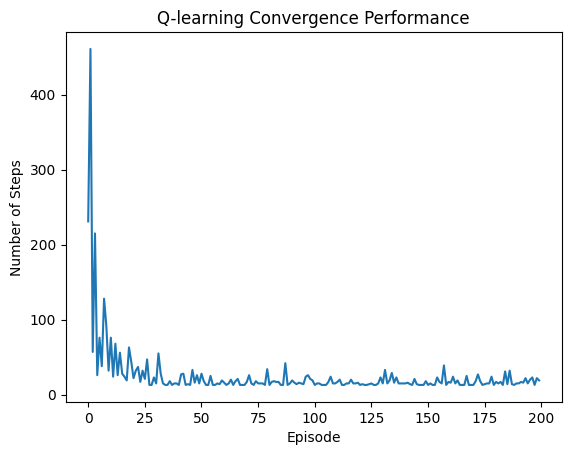

In [99]:
# Define the parameters.
alpha = 0.5 
gamma = 0.9
num_episodes = 200
success_reward = 100
supplementary_step = 1
episode_steps = []

# The Q-table is already initialized but we reinit it (just in case).
observation_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q_table = np.zeros((observation_space_size, action_space_size))

# Initialize the environment.
env = gym.make('CliffWalking-v0', render_mode="rgb_array")

# Simulate Q-learning fr 200 episodes.
for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0
    steps_taken = 0

    done = False
    while not done:
        # Choose action using epsilon-greedy policy.
        action = epsilon_greedy(Q_table, state)

        # Take the chosen action.
        next_state, reward, done, _, _ = env.step(action)

        # Update Q-table using the Q-learning update rule.
        Q_table[state, action] += alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

        # Update total reward and step count.
        total_reward += reward
        steps_taken += 1

        # Move to the next state.
        state = next_state

    # After each episode, fix a positive reward for success. here we substract the number of steps from the rewards to promote short paths.
    Q_table[state, action] += alpha * ((success_reward - supplementary_step * steps_taken) - Q_table[state, action])

    # Store the number of steps taken in this episode.
    episode_steps.append(steps_taken)

# Visualize the convergence performance of this algorithm.
plt.plot(episode_steps)
plt.xlabel('Episode')
plt.ylabel('Number of Steps')
plt.title('Q-learning Convergence Performance')
plt.show()

We can see that the number os steps is incredly high at the beginning, during the first trials of the AI. Then, the nmber of steps decreases significantly because our model is improving itself from the Q-learning algorithm. Finally, the performances are constant at the end and prove that our model is too bad and it can easily go grab the cookie.

## Questions

Questions :
1. Quels sont les avantages d’un tel algorithme ?
2. Quelles sont les limites actuelles de l’algorithme dans le cadre de ce jeu ?

1. Advantages of Q-learning in this context:
The Q-learning operates without requiring a model of the environment, makng it adaptable to situations with unknown dynamics and this is perfect in the case of this map. Moreover, the algorithm accommodates discrete action spaces, making it applicable to a wide range of problems, including those with distinct actions (like here for exam^le). The epsilon-greedy strategy enables a balanced approach to exploration and exploitation, a crucial factor for learning optimal policies in dynamic environments.

2. Current limitations in the context of this game:
Despite the epsilon-greedy strategy, Q-learning may not explore the complete state-action space, potentialy leading to suboptimal policies. The Q-learning's performance is sensitive to hyperparameters such as the learning rate (alpha), discount factor (gamma), and exploration rate (epsilon). In scenarios with sparse rewards, such as the Cliff Walking game, the agent may face challenges in efficiently discovering optimal paths due to the rarity of reward signals (only at the end). Moreover, more a game has actions (not like here, this is simple, we have only 4 actions) more it is difficult for the model to be efficient and the execution time is extended. Here the map is simple but if we have made holes everywhere it will be more complicated and there is alwas a risk of overfitting, here the model almost know exactly where to know, but it do not knows the "concept" behind this (go grab the cookie). On another map it will be lost and do anything.

# Bonus

## Task 8: Study α and γ parameters of the algorithm

**Consigne :** Étudier les paramètres α et γ de l’algorithme Q-learning :
* Que pouvez-vous en déduire, par exemple pour α € [0.1, 0.5, 0.9] et γ = 0.9 ?
* Que pouvez-vous en déduire, par exemple pour γ € [0.1, 0.5, 0.9] et α = 0.5 ?

In [100]:
# We first define a function to train the Q-learning algorithm.
def train_q_learning(alpha, gamma):
    """
    Train the Q-learning algorithm on the 'CliffWalking-v0' environment.

    Args:
        alpha (float): Learning rate for Q-value updates.
        gamma (float): Discount factor for fture rewards.

    Returns:
        np.ndarray: The Q-table learned during training.
        list: Number of steps taken in each episode.
    """
    # Define the parameters.
    num_episodes = 200
    success_reward = 100
    supplementary_step = 1
    episode_steps = []

    # Initialize the environment.
    env = gym.make('CliffWalking-v0', render_mode="rgb_array")

    # The Q-table is already initialized but we reinit it (just in case).
    observation_space_size = env.observation_space.n
    action_space_size = env.action_space.n
    Q_table = np.zeros((observation_space_size, action_space_size))

    # Simulate Q-learning fr 200 episodes.
    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        steps_taken = 0
        
        done = False
        while not done:
            # Choose action using epsilon-greedy policy.
            action = epsilon_greedy(Q_table, state)

            # Take the chosen action.
            next_state, reward, done, _, _ = env.step(action)

            # Update Q-table using the Q-learning update rule.
            Q_table[state, action] += alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

            # Update total reward and step count.
            total_reward += reward
            steps_taken += 1

            # Move to the next state.
            state = next_state

        # After each episode, fix a positive reward for success. here we substract the number of steps from the rewards to promote short paths.
        Q_table[state, action] += alpha * ((success_reward - supplementary_step * steps_taken) - Q_table[state, action])

        # Store the number of steps taken in this episode.
        episode_steps.append(steps_taken)

    return Q_table, episode_steps

Alpha=0.1, Gamma=0.9
Q-table after training:
[[-5.56594645e+00 -5.58979212e+00 -5.56814707e+00 -5.59609051e+00]
 [-5.45487977e+00 -5.43189741e+00 -5.46208625e+00 -5.44293905e+00]
 [-5.18713584e+00 -5.19547885e+00 -5.18953051e+00 -5.23099163e+00]
 [-4.94399329e+00 -4.91846353e+00 -4.97271259e+00 -4.94040630e+00]
 [-4.61001689e+00 -4.57537626e+00 -4.61220905e+00 -4.64427733e+00]
 [-4.24352216e+00 -4.22399962e+00 -4.22642184e+00 -4.25372341e+00]
 [-3.80859369e+00 -3.81423471e+00 -3.77436190e+00 -3.87218342e+00]
 [-3.43738705e+00 -3.43016191e+00 -3.42739410e+00 -3.44362699e+00]
 [-3.03101553e+00 -3.01260179e+00 -2.59086333e+00 -3.02234265e+00]
 [-2.59531176e+00 -2.60573982e+00 -2.59185310e+00 -2.66749123e+00]
 [-2.21550080e+00 -2.22779660e+00 -2.18898899e+00 -2.26202962e+00]
 [-1.90272132e+00 -1.88004555e+00 -6.97838487e-01 -1.88675091e+00]
 [-5.70167245e+00 -5.35611811e+00 -5.69068302e+00 -5.68895326e+00]
 [-5.50849787e+00 -5.49062406e+00 -4.88552117e-01 -5.49606694e+00]
 [-5.24318240e+00

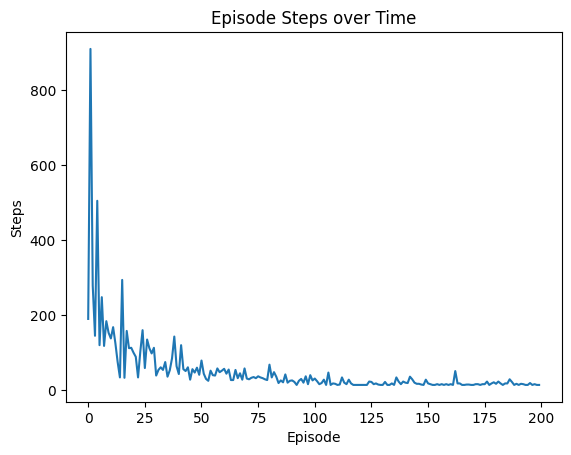

Alpha=0.5, Gamma=0.9
Q-table after training:
[[ -6.27872902  -6.36692584  -6.46006103  -6.40666676]
 [ -6.24772081  -6.27318756  -6.30987922  -6.2912024 ]
 [ -6.10962545  -5.93728584  -5.62303751  -6.05982673]
 [ -5.71343842  -5.61586118  -5.73851608  -5.80338125]
 [ -5.48900644  -5.30502183  14.23780012  -5.31500812]
 [ -4.86657917  -4.92768086  -4.91660255  -5.07195439]
 [ -4.46388338  -0.99274526  -4.53736996  -4.52865478]
 [ -3.92056882   6.36378646  -4.02527404  -4.25068221]
 [ -3.6975059   -3.46780432  25.73461475  -3.57772079]
 [ -3.01662704  -2.92824119   7.01402577  -3.22708599]
 [ -2.64908109  -2.46169063  41.47712966  -2.77702286]
 [ -2.26219063  -2.26219063  -2.29254688  -2.09594062]
 [ -6.51720816  10.44936517  -6.51779634  -6.55160419]
 [ -6.42484161  15.47150709  -6.40203311  -6.24738512]
 [ -5.95324162  18.86380936  -5.95845914  -5.93872088]
 [ -5.51754663  22.13155997   8.64788368  -5.8231557 ]
 [  0.15705354  25.91679742  -5.29336837  -5.2671481 ]
 [ -4.8132171   30.2

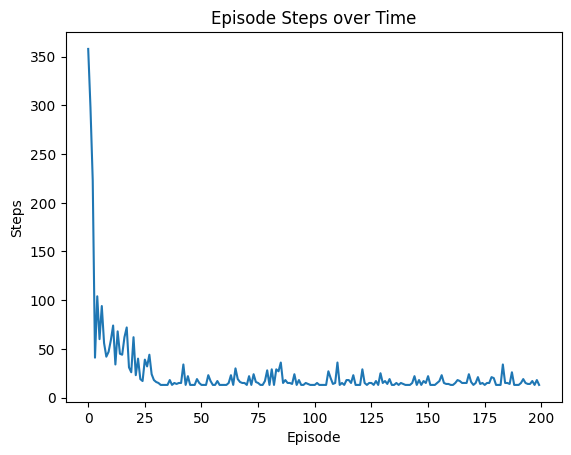

Alpha=0.9, Gamma=0.9
Q-table after training:
[[ -6.77524513  -6.73469987  -6.99362912  -6.89527229]
 [ -6.77524513  -6.60479025  -6.5676409   -6.47594748]
 [ -6.45631333  -6.37018822  -6.49804525  -6.72790341]
 [ -6.10583882   8.89497887  -6.33954869  -6.07246214]
 [ -5.79705725  16.70279268  -5.77533037  -5.81799661]
 [ -5.49842449  25.69384034  -5.21017182  -5.32100021]
 [ -5.06595005  29.52921135  -4.94935677  -5.3962139 ]
 [ 22.84829007  34.27828997  -4.32512472  14.13415919]
 [ -3.75967855  38.11716906  -3.77050081  -3.57699988]
 [ 33.37766582  42.99086797  -3.19705749  33.02408048]
 [ 37.15936132  -1.8912447   50.93432572  37.5458929 ]
 [ -2.46429     -2.46429     56.00061801  -2.47158   ]
 [ -6.89732924  -6.96345564   9.42528405  -7.06547306]
 [ -6.79357873  16.07594506  -6.99439155   5.6859801 ]
 [ -6.64155931  18.62673241  11.60876294   6.03435935]
 [ -4.22614409  21.71283955  13.74016784  16.42756846]
 [ 11.38140627  25.70188072  -5.77679487  17.21021717]
 [ 21.01043243  28.8

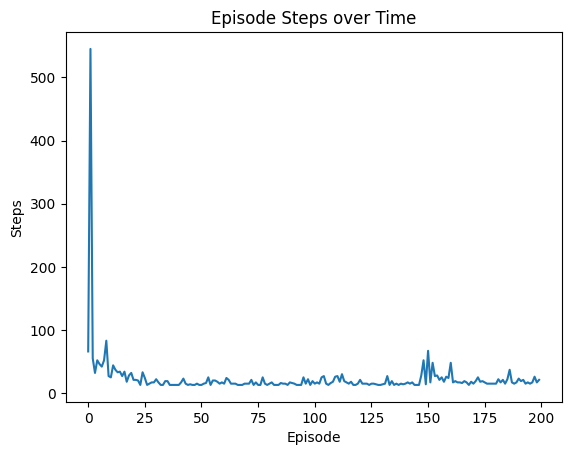

Alpha=0.5, Gamma=0.1
Q-table after training:
[[  -1.11111111   -1.11111111   -1.11111111   -1.11111111]
 [  -1.11111111   -1.11111111   -1.11111111   -1.11111111]
 [  -1.11111111   -1.11111111   -1.11111111   -1.11111111]
 [  -1.11111111   -1.11111111   -1.11111111   -1.11111111]
 [  -1.11111109   -1.11111109   -1.11111109   -1.1111111 ]
 [  -1.11111098   -1.11111097   -1.111111     -1.11111101]
 [  -1.11111044   -1.11111014   -1.11111019   -1.11111041]
 [  -1.11110706   -1.11110531   -1.11110783   -1.111106  ]
 [  -1.11108588   -1.11108361   -1.11107684   -1.11109191]
 [  -1.11096842   -1.11094553   -1.11068837   -1.11096727]
 [  -1.11020742   -1.11017119   -1.10971772   -1.11017952]
 [  -1.10944806   -1.10829672   -1.10813692   -1.10908721]
 [  -1.11111111   -1.11111111   -1.11111111   -1.11111111]
 [  -1.11111111   -1.11111111   -1.11111111   -1.11111111]
 [  -1.11111111   -1.11111111   -1.11111111   -1.11111111]
 [  -1.11111111   -1.1111111    -1.11111111   -1.11111111]
 [  -1.1111

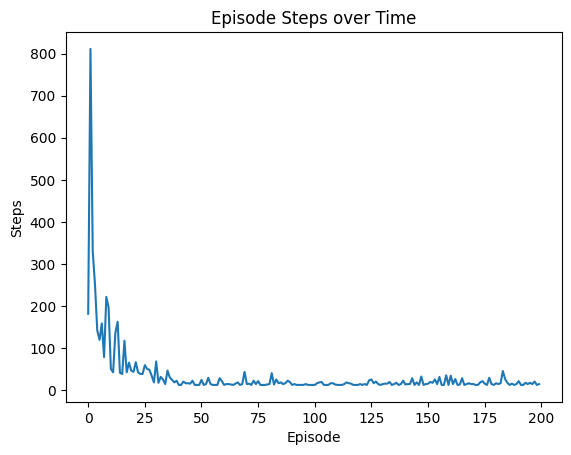

Alpha=0.5, Gamma=0.5
Q-table after training:
[[  -1.99607263   -1.99628323   -1.99714351   -1.99569438]
 [  -1.99510251   -1.9950449    -1.99262654   -1.99560707]
 [  -1.99126808   -1.99154554   -1.98682717   -1.99531848]
 [  -1.98706212   -1.98429912   -1.98896637   -1.98626945]
 [  -1.97861214   -1.97937272   -1.94020736   -1.98257941]
 [  -1.97331578   -1.96768527   -1.96899661   -1.97448597]
 [  -1.95248547   -1.93858689   -1.92571295   -1.9584275 ]
 [  -1.88737297   -1.8916893    -1.89229652   -1.91407105]
 [  -1.84983063   -1.8395462    -1.84678841   -1.88317382]
 [  -1.79977417   -1.76867676   -1.75266266   -1.82851601]
 [  -1.64404297   -1.6862793    -1.69567871   -1.72094727]
 [  -1.70336914   -1.64404297   -1.65753174   -1.62026978]
 [  -1.99716145   -1.99014791   -1.99717718   -1.99692997]
 [  -1.99645126   -1.97919288   -1.99524969   -1.9952691 ]
 [  -1.99358952   -1.95837825   -1.97436921   -1.99330583]
 [  -1.99069169   -1.91740764   -1.98600643   -1.9885077 ]
 [  -1.9835

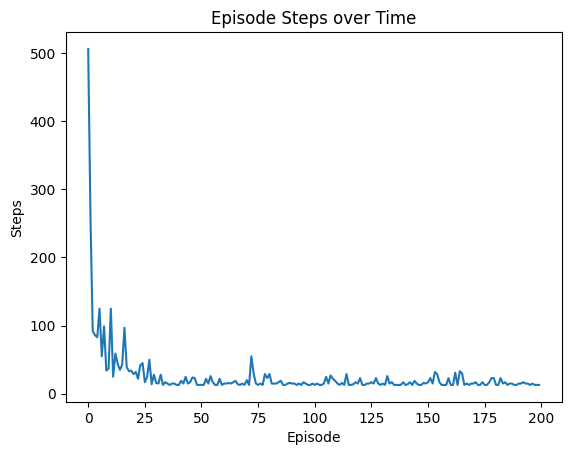

Alpha=0.5, Gamma=0.9
Q-table after training:
[[ -5.84207329  -5.89317984  -5.91344245  -5.92361629]
 [ -5.72799402  -5.55351524   3.77584834  -5.54563343]
 [ -5.4631878   -1.03347525  -5.27481556  -5.48516027]
 [ -5.19608841  -5.00592538  17.29857957  -5.16556248]
 [ -4.86657917  -4.68306299  18.97043211  -5.21175297]
 [ -4.25349336   8.29627964  -4.33229172  -4.62498485]
 [ -3.6975059   27.03368752  -3.86540529  -4.15307512]
 [ -3.58271414  -3.22630277  34.57908672  -3.21454498]
 [ -2.64908109  20.87669006  -2.83567578  -2.90437466]
 [ -2.26219063  -2.1864375   45.03514149  -2.13675   ]
 [ -1.8549375   -1.7675      -1.9221875   27.74462959]
 [ -1.42625     -1.42625     28.28205208  -1.6293125 ]
 [ -6.05672464  13.14524778  -5.99833592  -6.00445423]
 [ -5.60076444  16.3287624   -5.77240299  -5.89388758]
 [ -5.44746135  19.12147193  11.24694276  10.56538391]
 [  7.61944932  22.20975186   8.17120567  -4.28571293]
 [  6.95900809  25.56703827  15.5133173   17.49279222]
 [ -4.54588306  29.3

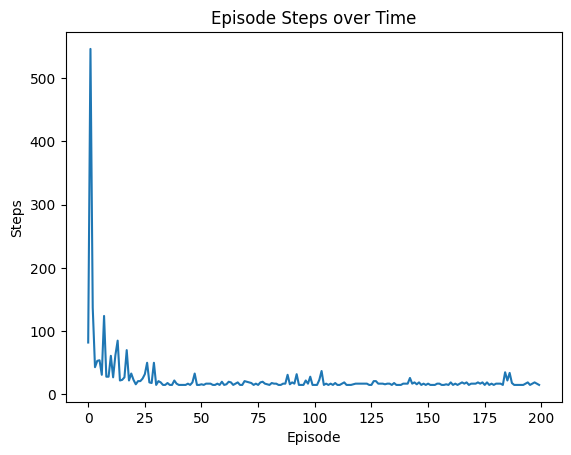

In [101]:
# Parameter values.
alpha_values = [0.1, 0.5, 0.9]
gamma_values = [0.1, 0.5, 0.9]

gamma = 0.9
# Test different combinations of alpha and gamma parameter values.
for alpha in alpha_values:
    # Train Q-learning with specified parameters.
    Q_table, episode_steps = train_q_learning(alpha, gamma)

    # Display results.
    print(f"Alpha={alpha}, Gamma={gamma}")
    print("Q-table after training:")
    print(Q_table)

    # Visualize episode steps.
    plt.plot(episode_steps)
    plt.title("Episode Steps over Time")
    plt.xlabel("Episode")
    plt.ylabel("Steps")
    plt.show()

alpha = 0.5
# Again.
for gamma in gamma_values:
    Q_table, episode_steps = train_q_learning(alpha, gamma)

    # Display results.
    print(f"Alpha={alpha}, Gamma={gamma}")
    print("Q-table after training:")
    print(Q_table)

    # Visualize episode steps.
    plt.plot(episode_steps)
    plt.title("Episode Steps over Time")
    plt.xlabel("Episode")
    plt.ylabel("Steps")
    plt.show()

We can now compare the results for each parameter.
When alpha is low, there is a slower convergence, the algorithm treat less information. When alphs is too high it might overshoot optimal values. The intermediate value (0.5) offers a reasonnable conveergence speed.
When gamme is low it prioritizes short term rewards, potentially conducting a myopic policy. A high gamma encourages the agent to test other possibilities and the middle value is the balance. 
For α ∈ [0.1, 0.5, 0.9] and γ = 0.9, we can see a faster convergence with increasing α, but higher values may introduce instability.
For γ ∈ [0.1, 0.5, 0.9] and α = 0.5, anticipate more forward-looking behavior with higher γ, valuing long-term rewards in the decision-making process.

## Task 9: Develop a SARSA algorithm

**Consigne :** Développer l’algorithme *SARSA*, qui est lui orienté politique de choix :
* Comparer les performances des deux algorithmes développés.
* Que pouvez-vous en conclure ?

In [108]:
# We first define a function to train the SARSA algorithm.
def train_sarsa(alpha, gamma):
    """
    Train the SARSA algorithm on the 'CliffWalking-v0' environment.

    Args:
        alpha (float): Learning rate for Q-value updates.
        gamma (float): Discount factor for fture rewards.

    Returns:
        np.ndarray: The Q-table learned during training.
        list: Number of steps taken in each episode.
    """
    # Define the parameters.
    num_episodes = 20
    success_reward = 100
    supplementary_step = 1
    episode_steps = []

    # Initialize the environment.
    env = gym.make('CliffWalking-v0', render_mode="rgb_array")

    # The Q-table is already initialized but we reinit it (just in case).
    observation_space_size = env.observation_space.n
    action_space_size = env.action_space.n
    Q_table = np.zeros((observation_space_size, action_space_size))

    # Simulate Q-learning fr 200 episodes.
    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        steps_taken = 0

        print("done")
        done = False
        while not done:
            # Choose action using epsilon-greedy policy.
            action = epsilon_greedy(Q_table, state)

            # Take the chosen action.
            state, reward, done, _, _ = env.step(action)

            # Update Q-table using SARSA update rule.
            Q_table[state, action] += alpha * (reward + gamma * Q_table[state, action] - Q_table[state, action])

            # Update total reward and step count.
            total_reward += reward
            steps_taken += 1

            # Move to the next state.
            state = next_state

        # After each episode, fix a positive reward for success. here we substract the number of steps from the rewards to promote short paths.
        Q_table[state, action] += alpha * ((success_reward - supplementary_step * steps_taken) - Q_table[state, action])

        # Store the number of steps taken in this episode.
        episode_steps.append(steps_taken)

    return Q_table, episode_steps

Let's use it.

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
Alpha=0.5, Gamma=0.9
Q-table for SARSA after training:
[[-1.00000000e+01  0.00000000e+00  0.00000000e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  0.00000000e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  0.00000000e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  0.00000000e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  0.00000000e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  0.00000000e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  0.00000000e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  0.00000000e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  0.00000000e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  0.00000000e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  0.00000000e+00 -1.00000000e+01]
 [-1.00000000e+01 -1.00000000e+01  0.00000000e+00  0.00000000e+00]
 [-1.00000000e+01  0.00000000e+00 -1.0000

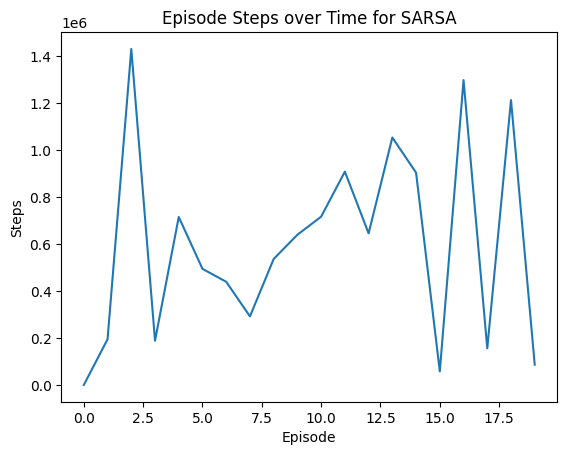

In [109]:
alpha_sarsa = 0.5
gamma_sarsa = 0.9
Q_table_sarsa, episode_steps_sarsa = train_sarsa(alpha_sarsa, gamma_sarsa)

# Display results.
print(f"Alpha={alpha_sarsa}, Gamma={gamma_sarsa}")
print("Q-table for SARSA after training:")
print(Q_table_sarsa)

# Visualize episode steps.
plt.plot(episode_steps_sarsa)
plt.title("Episode Steps over Time for SARSA")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.show()

We can see that the SARSA algorithm is way more efficient as the QLearning algorithm, but it is way more long to execute.
This is beacause SARSA is another reinforcement learning algorithm (so similar to Q-learning) but differs in the way it updates the Q-values. It updates the Q-value based on the current action and the action actually taken in the next state. So update all the table is takes more time than only one value.